### File to Create Jaccard Similarity Histogram and Initial Ranking ###

In [1]:
# Import everything needed
from toxicity_ranking import *
import numpy as np

Get the jaccard similarity for all the unique drug pairs, plot a distribution

In [2]:
# Get the data needed
drugcomb_df = get_drug_comb_data(bliss=True, loewe=True, hsa=True, zip=True)
sider_cid_to_drugs_df, sider_all_side_effects_df = get_sider_data()

filtered_drug_comb_data, common_drugs, unique_drug_pairs = filter_drug_comb_data(drugcomb_df, sider_cid_to_drugs_df)

# Create a dictionary to store the Jaccard similarity of each drug pair
drug_pair_to_jaccard = {}
drug_pair_to_side_effects = {}

# Loop through each drug pair in unique_drug_pairs
for drug_pair in unique_drug_pairs:
    # Get the drugs in the pair
    drug1_name, drug2_name = drug_pair
    drug1_CID = sider_cid_to_drugs_df[sider_cid_to_drugs_df['drug_name'] == drug1_name]['CID'].values[0]
    drug2_CID = sider_cid_to_drugs_df[sider_cid_to_drugs_df['drug_name'] == drug2_name]['CID'].values[0]

    # Get the side effects of each drug
    side_effects1 = sider_all_side_effects_df[sider_all_side_effects_df['CID_FLAT'] == drug1_CID]['Side_Effect'].values
    side_effects2 = sider_all_side_effects_df[sider_all_side_effects_df['CID_FLAT'] == drug2_CID]['Side_Effect'].values

    # Calculate the Jaccard similarity of the side effects
    jaccard = jaccard_similarity(set(side_effects1), set(side_effects2))

    # Store the Jaccard similarity in the dictionary
    drug_pair_to_jaccard[drug_pair] = jaccard
    drug_pair_to_side_effects[drug_pair] = (side_effects1, side_effects2)

/Users/alexwong/Research/toxicity-cancer-drug-combination/toxicity_ranking.py:13: DtypeWarning: Columns (2,7,19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  drugcomb_df = pd.read_csv('data/DrugComb/drugcomb_summary_v_1_5.csv', sep=',', index_col=False)


Original shape of drugcomb data:  (1432351, 26)
Final shape of filtered drugcomb data:  (123882, 26)
Original drugcomb data shape:  (123882, 26)
Number of drugs in common between drugcomb and sider [lowercase enforced]:  401
Filtered drugcomb data shape for both drugs being present in sider:  (20824, 26)
Number of unique drug pairs:  6552


Create histogram of jaccard distribution

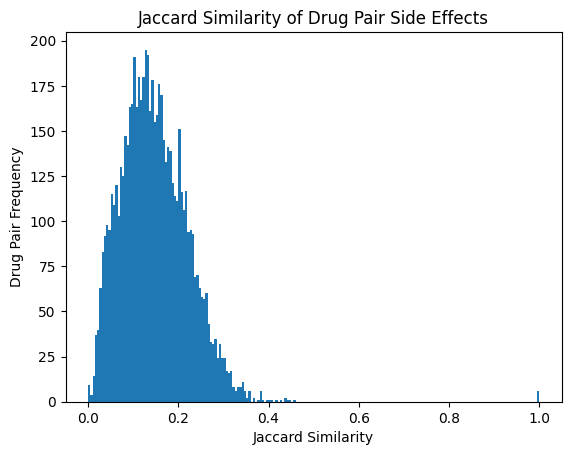

In [3]:
# Create a histogram of the jaccard similarities stored in the drug_pair_to_jaccard dictionary
import matplotlib.pyplot as plt
jaccard_values = list(drug_pair_to_jaccard.values())
plt.hist(jaccard_values, bins=200)
plt.xlabel('Jaccard Similarity')
plt.ylabel('Drug Pair Frequency')
plt.title('Jaccard Similarity of Drug Pair Side Effects')
plt.savefig('results/jaccard_similarity_histogram.png')

In [4]:
# Rank the drug pairs by Jaccard similarity

# zip the drug pairs and their Jaccard similarities
drug_pairs = list(drug_pair_to_jaccard.keys())
jaccard_values = list(drug_pair_to_jaccard.values())
zipped = list(zip(drug_pairs, jaccard_values))

# sort the zipped list by Jaccard similarity
zipped.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 drug pairs and their Jaccard similarities
for i in range(10):
    print(zipped[i])

(('vemurafenib', 'vemurafenib'), 1.0)
(('cladribine', 'cladribine'), 1.0)
(('temozolomide', 'temozolomide'), 1.0)
(('ponatinib', 'ponatinib'), 1.0)
(('clofarabine', 'clofarabine'), 1.0)
(('trametinib', 'trametinib'), 1.0)
(('acarbose', 'miglitol'), 0.45652173913043476)
(('acamprosate', 'tiagabine'), 0.44537815126050423)
(('exemestane', 'letrozole'), 0.4423076923076923)
(('imatinib', 'nilotinib'), 0.43548387096774194)


In [5]:
# Print the bottom 10 drug pairs and their Jaccard similarities
for i in range(10):
    print(zipped[-i-1])

(('dopamine', 'chlorzoxazone'), 0.0)
(('mebendazole', 'epinephrine'), 0.0)
(('paromomycin', 'disulfiram'), 0.0)
(('testolactone', 'dutasteride'), 0.0)
(('dutasteride', 'etomidate'), 0.0)
(('testolactone', 'mebendazole'), 0.0)
(('etomidate', 'paromomycin'), 0.0)
(('monobenzone', 'temozolomide'), 0.0)
(('paromomycin', 'bortezomib'), 0.004815409309791332)
(('paromomycin', 'doxorubicin'), 0.005758157389635317)


In [6]:
# Get histogram of number of side effects per drug
sider_cid_to_drugs_df, sider_all_side_effects_df = get_sider_data()

# What does the sider_cid_to_drugs_df look like?
print(sider_cid_to_drugs_df.head())

# What does the sider_all_side_effects_df look like?
print(sider_all_side_effects_df.head())

# Get drug name to side effects dictionary
drug_to_side_effects = get_drug_to_side_effects(sider_cid_to_drugs_df, sider_all_side_effects_df)

            CID                 drug_name
0  CID100000119        gamma-aminobutyric
1  CID100000137          5-aminolevulinic
2  CID100000143                leucovorin
3  CID100000146  5-methyltetrahydrofolate
4  CID100000158                      pge2
       CID_FLAT    CID_STEREO UMLS_Label MedDRA_Concept UMLS_MedDRA  \
0  CID100000085  CID000010917   C0000729             PT    C0000737   
1  CID100000085  CID000010917   C0000737            LLT    C0000737   
2  CID100000085  CID000010917   C0000737             PT    C0687713   
3  CID100000085  CID000010917   C0000737             PT    C0000737   
4  CID100000085  CID000010917   C0002418            LLT    C0002418   

             Side_Effect  
0         Abdominal pain  
1         Abdominal pain  
2  Gastrointestinal pain  
3         Abdominal pain  
4              Amblyopia  


What does the distribution look like for number of side effects per drug in SIDER?

Average number of side effects per drug:  115.17870439314966


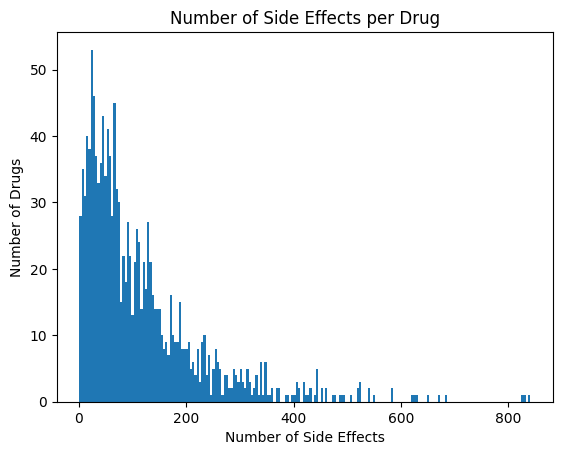

In [7]:
# Get the number of side effects for each drug
num_side_effects = [len(side_effects) for side_effects in drug_to_side_effects.values()]

# Plot the histogram
plt.hist(num_side_effects, bins=200)
plt.xlabel('Number of Side Effects')
plt.ylabel('Number of Drugs')
plt.title('Number of Side Effects per Drug')

plt.savefig('results/num_side_effects_per_drug_histogram.png')
print("Average number of side effects per drug: ", np.mean(num_side_effects))


In [8]:
# Get the number of side effects for each drug
# mebendazole
print("Number of side effects for mebendazole: ", len(drug_to_side_effects['mebendazole']))
print("Side effects for mebendazole: ", drug_to_side_effects['mebendazole'])

# testolactone
print("Number of side effects for testolactone: ", len(drug_to_side_effects['testolactone']))
print("Side effects for testolactone: ", drug_to_side_effects['testolactone'])

# etomidate
print("Number of side effects for etomidate: ", len(drug_to_side_effects['etomidate']))
print("Side effects for etomidate: ", drug_to_side_effects['etomidate'])

# paromomycin
print("Number of side effects for paromomycin: ", len(drug_to_side_effects['paromomycin']))
print("Side effects for paromomycin: ", drug_to_side_effects['paromomycin'])

# dutasteride
print("Number of side effects for dutasteride: ", len(drug_to_side_effects['dutasteride']))
print("Side effects for dutasteride: ", drug_to_side_effects['dutasteride'])

Number of side effects for mebendazole:  13
Side effects for mebendazole:  {'Hypersensitivity', 'Prolonged menses', 'Menorrhagia', 'Rash', 'Convulsion', 'Urticaria', 'Dermatitis', 'Angioedema', 'Abdominal pain', 'Neutropenia', 'Gastrointestinal pain', 'Hepatitis', 'Agranulocytosis'}
Number of side effects for testolactone:  16
Side effects for testolactone:  {'Discomfort', 'Oedema', 'Ill-defined disorder', 'Decreased appetite', 'Nausea', 'Erythema', 'Pain', 'Blood pressure increased', 'Glossitis', 'Malaise', 'Feeling abnormal', 'Ache', 'Alopecia', 'Paraesthesia', 'Vomiting', 'Anorexia'}
Number of side effects for etomidate:  23
Side effects for etomidate:  {'Hyperventilation', 'Hypertension', 'Arrhythmia', 'Convulsion', 'Hypoxia', 'Vein pain', 'Nausea postoperative', 'Vomiting', 'Respiratory failure', 'Myoclonus', 'Hypoventilation', 'Disinhibition', 'Snoring', 'Pain', 'Tachycardia', 'Upper airway obstruction', 'Procedural nausea', 'Laryngospasm', 'Apnoea', 'Hypotension', 'Bradycardia',